In [57]:
import pandas as pd
import numpy as np
import os
import random

In [58]:
#I picked 6 because I like 6. This is so we get the same results every time
np.random.seed(6)

In [59]:
#idk make your working directory whatever works for you
os.chdir('C:/Users/Luis/Documents/GitHub/anaan_ml/')

In [60]:
#reading in our data
dat = pd.read_csv('cleaning and combining datasets/ANAANcombined_cec_2023-07-19.csv')
dat

,study,participant_id,sex,gender,sexual_orient,age,height,weight,bmi,dx,CurrentDX2,comorbidities,education_level,school_year,employment,religion,religion_desc,ethnicity,API,ethnicity_desc,meds,income,marital_status,smoking_status,ede_q_1,ede_q_2,ede_q_3,ede_q_4,ede_q_5,ede_q_6,ede_q_7,ede_q_8,ede_q_9,ede_q_10,ede_q_11,ede_q_12,ede_q_13,ede_q_14,ede_q_15,ede_q_16,ede_q_17,ede_q_18,ede_q_19,ede_q_20,ede_q_21,ede_q_22,ede_q_23,ede_q_24,ede_q_25,ede_q_26,ede_q_27,ede_q_28,ede_q_29,ede_q_30,ede_q_31,ede_q_32,ede_q_33,ede_q_34,ede_q_35,ede_q_36,ede_q_37,ede_q_38,ede_q_39,ede_q_40,ede_q_41,ede_q_42,edeq4_restraint,edeq4_ec,edeq4_sc,edeq4_wc,edeq4_global,edeq6_1,edeq6_2,edeq6_3,edeq6_4,edeq6_5,edeq6_6,edeq6_7,edeq6_8,edeq6_9,edeq6_10,edeq6_11,edeq6_12,edeq6_13,edeq6_14,edeq6_15,edeq6_16,edeq6_17,edeq6_18,edeq6_19,edeq6_20,edeq6_21,edeq6_22,edeq6_23,edeq6_24,edeq6_25,edeq6_26,edeq6_27,edeq6_28,edeq6_29,edeq6_30,edeq6_31,edeq6_32,edeq6_33,edeq6_missedperiod,edeq6_nummissperiod,edeq6_pill,edeq6_restraint,edeq6_ec,edeq6_sc,edeq6_wc,edeq6_global,saas_1,saas_1r,saas_2,saas_3,saas_4,saas_5,saas_6,saas_7,saas_8,saas_9,saas_10,saas_11,saas_12,saas_13,saas_14,saas_15,saas_16,saas_total,oci_1,oci_2,oci_3,oci_4,oci_5,oci_6,oci_7,oci_8,oci_9,oci_10,oci_11,oci_12,oci_13,oci_14,oci_15,oci_16,oci_17,oci_18,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fof_1,fof_2,fof_3,fof_4,fof_5,fof_6,fof_7,fof_8,fof_9,fof_10,fof_11,fof_12,fof_13,fof_14,fof_15,fof_16,fof_17,fof_18,fof_19,fof_20,fof_21,fof_22,fof_23,fof_24,fof_25,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_1,fmps_2,fmps_3,fmps_4,fmps_5,fmps_6,fmps_7,fmps_8,fmps_9,fmps_10,fmps_11,fmps_12,fmps_13,fmps_14,fmps_15,fmps_16,fmps_17,fmps_18,fmps_19,fmps_20,fmps_21,fmps_22,fmps_23,fmps_24,fmps_25,fmps_26,fmps_27,fmps_28,fmps_29,fmps_30,fmps_31,fmps_32,fmps_33,fmps_34,fmps_35,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_1,pswq1r,pswq_2,pswq_3,pswq3r,pswq_4,pswq_5,pswq_6,pswq_7,pswq_8,pswq8r,pswq_9,pswq_10,pswq10r,pswq_11,pswq11r,pswq_12,pswq_13,pswq_14,pswq_15,pswq_16,pswq_total,bdi_1,bdi_2,bdi_3,bdi_4,bdi_5,bdi_6,bdi_7,bdi_8,bdi_9,bdi_10,bdi_11,bdi_12,bdi_13,bdi_14,bdi_15,bdi_16,bdi_17,bdi_18,bdi_19,bdi_20,bdi_21,bdi_total,efq_1,efq_2,efq_3,efq_4,efq_5,efq_6,efq_7,efq_8,efq_9,efq_10,efq_11,efq_12,efq_13,efq_14,efq_15,efq_16,efq_17,efq_18,efq_19,efq_20,efq_wtgain,efq_socialcons,efq_personal,efq_discomf,efq_socialeat,pclc_1,pclc_2,pclc_3,pclc_4,pclc_5,pclc_6,pclc_7,pclc_8,pclc_9,pclc_10,pclc_11,pclc_12,pclc_13,pclc_14,pclc_15,pclc_16,pclc_17,pclc_global,epsi_1,epsi_2,epsi_3,epsi_4,epsi_5,epsi_6,epsi_7,epsi_8,epsi_9,epsi_10,epsi_11,epsi_12,epsi_13,epsi_14,epsi_15,epsi_16,epsi_17,epsi_18,epsi_19,epsi_20,epsi_21,epsi_22,epsi_23,epsi_24,epsi_25,epsi_26,epsi_27,epsi_28,epsi_29,epsi_30,epsi_31,epsi_32,epsi_33,epsi_34,epsi_35,epsi_36,epsi_37,epsi_38,epsi_39,epsi_40,epsi_41,epsi_42,epsi_43,epsi_44,epsi_45,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,DH3,DH002,female,cis woman,heterosexual,27,68.0,99.0,15.051254,AN,ANR,NaN,Master's degree,18.0,not working,Agnostic,"Raised Catholic, currently agnostic.","White, not of Hispanic origin (includes Caucas...",NaN,Irish/Polish descent.,NaN,NaN,NaN,NaN,6.0,0.0,5.0,6.0,5.0,1.0,0.0,0.0,0.0,3.0,1.0,3.0,3.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,2.0,2.0,6.0,4.0,4.0,5.0,1.0,NaN,3.6,2.4,3.000,3.0,3.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,5.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,2.0,2.0,5.0,2.0,2.0,43.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,2.0,4.0,2.0,1.0,6.0,2.0,5.0,5.0,6.0,2.0,1.0,2.0,2.0,6.0,6.0,6.0,2.0,1.0,38.0,20.0,28.0,86.0,4.0,4.0,3.0,5.0,3.0,5.0,4.0,5.0,5.

In [61]:
#i want to see every column
pd.set_option("display.max.columns", None)

In [62]:
#easier to look at column names this way
for col in dat.columns: 
    print(col)

study
participant_id
sex
gender
sexual_orient
age
height
weight
bmi
dx
CurrentDX2
comorbidities
education_level
school_year
employment
religion
religion_desc
ethnicity
API
ethnicity_desc
meds
income
marital_status
smoking_status
ede_q_1
ede_q_2
ede_q_3
ede_q_4
ede_q_5
ede_q_6
ede_q_7
ede_q_8
ede_q_9
ede_q_10
ede_q_11
ede_q_12
ede_q_13
ede_q_14
ede_q_15
ede_q_16
ede_q_17
ede_q_18
ede_q_19
ede_q_20
ede_q_21
ede_q_22
ede_q_23
ede_q_24
ede_q_25
ede_q_26
ede_q_27
ede_q_28
ede_q_29
ede_q_30
ede_q_31
ede_q_32
ede_q_33
ede_q_34
ede_q_35
ede_q_36
ede_q_37
ede_q_38
ede_q_39
ede_q_40
ede_q_41
ede_q_42
edeq4_restraint
edeq4_ec
edeq4_sc
edeq4_wc
edeq4_global
edeq6_1
edeq6_2
edeq6_3
edeq6_4
edeq6_5
edeq6_6
edeq6_7
edeq6_8
edeq6_9
edeq6_10
edeq6_11
edeq6_12
edeq6_13
edeq6_14
edeq6_15
edeq6_16
edeq6_17
edeq6_18
edeq6_19
edeq6_20
edeq6_21
edeq6_22
edeq6_23
edeq6_24
edeq6_25
edeq6_26
edeq6_27
edeq6_28
edeq6_29
edeq6_30
edeq6_31
edeq6_32
edeq6_33
edeq6_missedperiod
edeq6_nummissperiod
edeq6_pill
edeq6_re

In [63]:
#removing individual variables and only keeping subscales and totals
cleandat = dat.drop(columns = {'bdi_1', 'bdi_2', 'bdi_3', 'bdi_4', 'bdi_5', 'bdi_6', 'bdi_7', 'bdi_8', 'bdi_9', 'bdi_10', 'bdi_11', 'bdi_12', 'bdi_13', 'bdi_14', 'bdi_15', 'bdi_16', 'bdi_17', 'bdi_18', 'bdi_19', 'bdi_20', 'bdi_21', 
                               'ede_q_1', 'ede_q_2', 'ede_q_3', 'ede_q_4', 'ede_q_5', 'ede_q_6', 'ede_q_7', 'ede_q_8', 'ede_q_9', 'ede_q_10', 'ede_q_11', 'ede_q_12', 'ede_q_13', 'ede_q_14', 'ede_q_15', 'ede_q_16', 'ede_q_17', 'ede_q_18', 'ede_q_19', 'ede_q_20', 'ede_q_21', 'ede_q_22', 'ede_q_23', 'ede_q_24', 'ede_q_25', 'ede_q_26', 'ede_q_27', 'ede_q_28', 'ede_q_29', 'ede_q_30', 'ede_q_31', 'ede_q_32', 'ede_q_33', 'ede_q_34', 'ede_q_35', 'ede_q_36', 'ede_q_37', 'ede_q_38', 'ede_q_39', 'ede_q_40', 'ede_q_41', 'ede_q_42', 'edeq4_restraint', 'edeq4_ec', 'edeq4_sc', 'edeq4_wc', 'edeq4_global',
                               'fof_1', 'fof_2', 'fof_3', 'fof_4', 'fof_5', 'fof_6', 'fof_7', 'fof_8', 'fof_9', 'fof_10', 'fof_11', 'fof_12', 'fof_13', 'fof_14', 'fof_15', 'fof_16', 'fof_17', 'fof_18', 'fof_19', 'fof_20', 'fof_21', 'fof_22', 'fof_23', 'fof_24', 'fof_25',
                               'oci_1', 'oci_2', 'oci_3', 'oci_4', 'oci_5', 'oci_6', 'oci_7', 'oci_8', 'oci_9', 'oci_10', 'oci_11', 'oci_12', 'oci_13', 'oci_14', 'oci_15', 'oci_16', 'oci_17', 'oci_18', 
                               'saas_1', 'saas_1r', 'saas_2', 'saas_3', 'saas_4', 'saas_5', 'saas_6', 'saas_7', 'saas_8', 'saas_9', 'saas_10', 'saas_11', 'saas_12', 'saas_13', 'saas_14', 'saas_15', 'saas_16', 
                               'fmps_1', 'fmps_2', 'fmps_3', 'fmps_4', 'fmps_5', 'fmps_6', 'fmps_7', 'fmps_8', 'fmps_9', 'fmps_10', 'fmps_11', 'fmps_12', 'fmps_13', 'fmps_14', 'fmps_15', 'fmps_16', 'fmps_17', 'fmps_18', 'fmps_19', 'fmps_20', 'fmps_21', 'fmps_22', 'fmps_23', 'fmps_24', 'fmps_25', 'fmps_26', 'fmps_27', 'fmps_28', 'fmps_29', 'fmps_30', 'fmps_31', 'fmps_32', 'fmps_33', 'fmps_34', 'fmps_35',
                               'pswq_1', 'pswq_2', 'pswq_3', 'pswq_4', 'pswq_5', 'pswq_6', 'pswq_7', 'pswq_8', 'pswq_9', 'pswq_10', 'pswq_11', 'pswq_12', 'pswq_13', 'pswq_14', 'pswq_15', 'pswq_16', 'pswq1r', 'pswq3r', 'pswq8r', 'pswq10r', 'pswq11r', 
                               'efq_1', 'efq_2', 'efq_3', 'efq_4', 'efq_5', 'efq_6', 'efq_7', 'efq_8', 'efq_9', 'efq_10', 'efq_11', 'efq_12', 'efq_13', 'efq_14', 'efq_15', 'efq_16', 'efq_17', 'efq_18', 'efq_19', 'efq_20', 
                               'edeq6_1', 'edeq6_2', 'edeq6_3', 'edeq6_4', 'edeq6_5', 'edeq6_6', 'edeq6_7', 'edeq6_8', 'edeq6_9', 'edeq6_10', 'edeq6_11', 'edeq6_12', 'edeq6_13', 'edeq6_14', 'edeq6_15', 'edeq6_16', 'edeq6_17', 'edeq6_18', 'edeq6_19', 'edeq6_20', 'edeq6_21', 'edeq6_22', 'edeq6_23', 'edeq6_24', 'edeq6_25', 'edeq6_26', 'edeq6_27', 'edeq6_28', 'edeq6_29', 'edeq6_30', 'edeq6_31', 'edeq6_32', 'edeq6_33', 'edeq6_missedperiod', 'edeq6_nummissperiod', 'edeq6_pill', 'edeq6_restraint', 'edeq6_ec', 'edeq6_sc', 'edeq6_wc', 'edeq6_global', 
                               'epsi_1', 'epsi_2', 'epsi_3', 'epsi_4', 'epsi_5', 'epsi_6', 'epsi_7', 'epsi_8', 'epsi_9', 'epsi_10', 'epsi_11', 'epsi_12', 'epsi_13', 'epsi_14', 'epsi_15', 'epsi_16', 'epsi_17', 'epsi_18', 'epsi_19', 'epsi_20', 'epsi_21', 'epsi_22', 'epsi_23', 'epsi_24', 'epsi_25', 'epsi_26', 'epsi_27', 'epsi_28', 'epsi_29', 'epsi_30', 'epsi_31', 'epsi_32', 'epsi_33', 'epsi_34', 'epsi_35', 'epsi_36', 'epsi_37', 'epsi_38', 'epsi_39', 'epsi_40', 'epsi_41', 'epsi_42', 'epsi_43', 'epsi_44', 'epsi_45', 
                               'pclc_1', 'pclc_2', 'pclc_3', 'pclc_4', 'pclc_5', 'pclc_6', 'pclc_7', 'pclc_8', 'pclc_9', 'pclc_10', 'pclc_11', 'pclc_12', 'pclc_13', 'pclc_14', 'pclc_15', 'pclc_16', 'pclc_17'})
cleandat

,study,participant_id,sex,gender,sexual_orient,age,height,weight,bmi,dx,CurrentDX2,comorbidities,education_level,school_year,employment,religion,religion_desc,ethnicity,API,ethnicity_desc,meds,income,marital_status,smoking_status,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,efq_discomf,efq_socialeat,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,DH3,DH002,female,cis woman,heterosexual,27,68.0,99.0,15.051254,AN,ANR,NaN,Master's degree,18.0,not working,Agnostic,"Raised Catholic, currently agnostic.","White, not of Hispanic origin (includes Caucas...",NaN,Irish/Polish descent.,NaN,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,50.0,10.0,6.0,3.750,4.2,5.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,DH3,DH004,female,cis woman,heterosexual,36,66.0,135.0,21.787190,AAN,AANBP,NaN,NaN,16.0,working part-time,Atheist,NaN,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,74.0,6.0,7.0,4.375,6.0,5.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,DH3,DH005,female,cis woman,heterosexual,27,66.0,105.0,16.945592,AN,ANR,NaN,NaN,18.0,working part-time,"Christian (Protestant, Baptist, Lutheran, Meth...",Presbyterian,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,77.0,21.0,6.0,4.375,5.4,2.333333,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,DH3,DH006,female,cis woman,heterosexual,30,60.0,106.0,20.699444,AAN,AANR,NaN,NaN,18.0,working full-time,Judaism,Conservative Judaism,"White, not of Hispanic origin (includes Caucas...",NaN,"American, originally Eastern European",NaN,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,76.0,19.0,7.0,6.250,6.4,5.666667,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,DH3,DH013,female,cis woman,heterosexual,26,63.0,105.0,18.597884,AN,ANBP,NaN,High school graduate,14.0,working full-time,Roman Catholicism,NaN,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,70.0,9.0,6.0,4.125,4.6,4.666667,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,CS,CS100,female,cis woman,heterosexual,39,66.0,125.0,20.173324,AAN,AANR,NaN,NaN,19.0,working full-time,"Christian (Protestant, Baptist, Lutheran, Meth...",Progressive Christian,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,"married, or remarried",no,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,71.0,29.0,7.0,5.125,5.0,5.666667,6.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,0.0,4.51250,3.2,5.4,5.250,4.2
444,CS,CS101,female,cis woman,heterosexual,57,64.0,96.0,16.476562,AN,ANBP,"Major Depressive Disorder, Generalized Anxiety...",NaN,18.0,not working,Roman Catholicism,Non-practicing Catholic,"White, not of Hispanic origin (includes Caucas...",NaN,Father - Irish descent Mother - Irish and Ger...,NaN,"less than $20,000",divorced,no,63.0,5.0,8.0,10.0,8.0,6.0,2.0,39.0,41.0,27.0,42.0,110.0,41.0,19.0,19.0,18.0,27.0,124.0,75.0,42.0,4.5,4.750,6.6,4.666667,5.0,79.0,21.0,26.0,7.0,4.0,12.0,9.0,11.0,14.0,3.20625,3.8,3.0,3.625,2.4
445,CS,CS103,female,cis wo

In [64]:
print(cleandat['sex'].unique())
print(cleandat['gender'].unique())
print(cleandat['sexual_orient'].unique())
print(cleandat['dx'].unique())
print(cleandat['education_level'].unique())
print(cleandat['employment'].unique())

['female' 'male' 'intersex']
['cis woman' 'cis man' 'nonbinary' 'Not listed' nan 'trans man']
['heterosexual' 'Not listed' 'gay or lesbian' 'bisexual' 'questioning' nan
 'Prefer not to disclose' 'lesbian or gay']
['AN' 'AAN']
["Master's degree" nan 'High school graduate' 'Less than high school'
 'Some college' "Associate's degree" "Bachelor's degree"
 'Doctorate or Professional Degree']
['not working' 'working part-time' 'working full-time' nan]


In [65]:
#We need to replace all the strings with integers for coding values and then convert them to integer. 
#Yes, I know this is an inefficient way to do this, but when I tried to do multiple at once it wouldn't work. So we're doing it this way
#sex = {1 = female, 2 = male, 3 = intersex}
cleandat['sex'] = cleandat['sex'].str.replace('female', '1')
cleandat['sex'] = cleandat['sex'].str.replace('male', '2')
cleandat['sex'] = cleandat['sex'].str.replace('intersex', '3')
cleandat['sex'] = pd.to_numeric(cleandat['sex'])

#gender = {1 = cis woman, 2 = cis man, 3 = nonbinary, 4 = Not listed, 5 = trans man}
cleandat['gender'] = cleandat['gender'].str.replace('cis woman', '1')
cleandat['gender'] = cleandat['gender'].str.replace('cis man', '2')
cleandat['gender'] = cleandat['gender'].str.replace('nonbinary', '3')
cleandat['gender'] = cleandat['gender'].str.replace('Not listed', '4')
cleandat['gender'] = cleandat['gender'].str.replace('trans man', '5')
cleandat['gender'] = pd.to_numeric(cleandat['gender'])

#sexual_orient = {1 = heterosexual, 2 = Not listed, 3 = gay or lesbian, 4 = bisexual, 5 = questioning, 6 = Prefer not to disclose}
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('heterosexual', '1')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('Not listed', '2')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('gay or lesbian', '3')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('bisexual', '4')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('questioning', '5')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('Prefer not to disclose', '6')
cleandat['sexual_orient'] = cleandat['sexual_orient'].str.replace('lesbian or gay', '3')
cleandat['sexual_orient'] = pd.to_numeric(cleandat['sexual_orient'])
cleandat

,study,participant_id,sex,gender,sexual_orient,age,height,weight,bmi,dx,CurrentDX2,comorbidities,education_level,school_year,employment,religion,religion_desc,ethnicity,API,ethnicity_desc,meds,income,marital_status,smoking_status,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,efq_discomf,efq_socialeat,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,DH3,DH002,1,1.0,1.0,27,68.0,99.0,15.051254,AN,ANR,NaN,Master's degree,18.0,not working,Agnostic,"Raised Catholic, currently agnostic.","White, not of Hispanic origin (includes Caucas...",NaN,Irish/Polish descent.,NaN,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,50.0,10.0,6.0,3.750,4.2,5.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,DH3,DH004,1,1.0,1.0,36,66.0,135.0,21.787190,AAN,AANBP,NaN,NaN,16.0,working part-time,Atheist,NaN,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,74.0,6.0,7.0,4.375,6.0,5.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,DH3,DH005,1,1.0,1.0,27,66.0,105.0,16.945592,AN,ANR,NaN,NaN,18.0,working part-time,"Christian (Protestant, Baptist, Lutheran, Meth...",Presbyterian,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,77.0,21.0,6.0,4.375,5.4,2.333333,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,DH3,DH006,1,1.0,1.0,30,60.0,106.0,20.699444,AAN,AANR,NaN,NaN,18.0,working full-time,Judaism,Conservative Judaism,"White, not of Hispanic origin (includes Caucas...",NaN,"American, originally Eastern European",NaN,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,76.0,19.0,7.0,6.250,6.4,5.666667,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,DH3,DH013,1,1.0,1.0,26,63.0,105.0,18.597884,AN,ANBP,NaN,High school graduate,14.0,working full-time,Roman Catholicism,NaN,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,70.0,9.0,6.0,4.125,4.6,4.666667,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,CS,CS100,1,1.0,1.0,39,66.0,125.0,20.173324,AAN,AANR,NaN,NaN,19.0,working full-time,"Christian (Protestant, Baptist, Lutheran, Meth...",Progressive Christian,"White, not of Hispanic origin (includes Caucas...",NaN,NaN,NaN,NaN,"married, or remarried",no,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,71.0,29.0,7.0,5.125,5.0,5.666667,6.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,0.0,4.51250,3.2,5.4,5.250,4.2
444,CS,CS101,1,1.0,1.0,57,64.0,96.0,16.476562,AN,ANBP,"Major Depressive Disorder, Generalized Anxiety...",NaN,18.0,not working,Roman Catholicism,Non-practicing Catholic,"White, not of Hispanic origin (includes Caucas...",NaN,Father - Irish descent Mother - Irish and Ger...,NaN,"less than $20,000",divorced,no,63.0,5.0,8.0,10.0,8.0,6.0,2.0,39.0,41.0,27.0,42.0,110.0,41.0,19.0,19.0,18.0,27.0,124.0,75.0,42.0,4.5,4.750,6.6,4.666667,5.0,79.0,21.0,26.0,7.0,4.0,12.0,9.0,11.0,14.0,3.20625,3.8,3.0,3.625,2.4
445,CS,CS103,1,1.0,4.0,23,63.0,103.0,18.243638,AN,ANR,NaN,NaN,16.0,working full-time,Nonreligious/secular,NaN,"White, not of Hispanic origin (includes Caucas...",NaN,

In [66]:
#dx = {1 = AN, 2 = AAN}
cleandat['dx'] = cleandat['dx'].str.replace('AN', '1')
cleandat['dx'] = cleandat['dx'].str.replace('A1', '2')
cleandat['dx'] = pd.to_numeric(cleandat['dx'])

#education_level = {1 = Less than high school, 2 = High school graduate, 3 = Some college, 4 = Associate's degree, 5 = Bachelor's degree, 6 = Master's degree, 7 = Doctorate or Professional Degree
cleandat['education_level'] = cleandat['education_level'].str.replace('Less than high school', '1')
cleandat['education_level'] = cleandat['education_level'].str.replace('High school graduate', '2')
cleandat['education_level'] = cleandat['education_level'].str.replace('Some college', '3')
cleandat['education_level'] = cleandat['education_level'].str.replace('''Associate's degree''', '4')
cleandat['education_level'] = cleandat['education_level'].str.replace('''Bachelor's degree''', '5')
cleandat['education_level'] = cleandat['education_level'].str.replace('''Master's degree''', '6')
cleandat['education_level'] = cleandat['education_level'].str.replace('Doctorate or Professional Degree', '7')
cleandat['education_level'] = pd.to_numeric(cleandat['education_level'])

#employment = {1 = not working, 2 = working part-time, 3 = working full-time}
cleandat['employment'] = cleandat['employment'].str.replace('not working', '1')
cleandat['employment'] = cleandat['employment'].str.replace('working part-time', '2')
cleandat['employment'] = cleandat['employment'].str.replace('working full-time', '3')
cleandat['employment'] = pd.to_numeric(cleandat['employment'])

In [67]:
print(cleandat['religion'].unique())
print(cleandat['ethnicity'].unique())
print(cleandat['income'].unique())
print(cleandat['marital_status'].unique())
print(cleandat['smoking_status'].unique())

['Agnostic' 'Atheist'
 'Christian (Protestant, Baptist, Lutheran, Methodist, Presbyterian, UCC)'
 'Judaism' 'Roman Catholicism' 'Nonreligious/secular' 'Not listed' nan
 'Hinduism' 'Buddhism' 'Islam']
['White, not of Hispanic origin (includes Caucasian, European American)'
 'Hispanic' 'Multiracial, Biracial, Multiple Broad Categories' 'AAPI'
 'American Indian or Alaskan Native' nan
 'Black, not of Hispanic origin (includes African American)' 'Not listed']
[nan '$100,000-$149,999' 'less than $20,000' '$35,000-$49,999'
 '$150,000-$199,999' '$20,000-$34,999' '$50,000-$74,999'
 '$200,000 or more' '$75,000-$99,999']
[nan 'married, or remarried' 'single, never married' 'divorced' 'widowed'
 'separated']
[nan 'no but I used to' 'no' 'yes']


In [68]:
#religion = {1 = Agnostic, 2 = Atheist, 3 = Christian/Catholic, 4 = Judaism, 5 = Nonreligious/secular, 6 = Hinduism, 7 = Buddism, 8 = Islam, 9 = Not listed}
cleandat['religion'] = cleandat['religion'].str.replace('Agnostic', '1')
cleandat['religion'] = cleandat['religion'].str.replace('Atheist', '2')
cleandat['religion'] = cleandat['religion'].str.replace('''Christian (Protestant, Baptist, Lutheran, Methodist, Presbyterian, UCC)''', '3')
cleandat['religion'] = cleandat['religion'].str.replace('Roman Catholicism', '3')
cleandat['religion'] = cleandat['religion'].str.replace('Judaism', '4')
cleandat['religion'] = cleandat['religion'].str.replace('Nonreligious/secular', '5')
cleandat['religion'] = cleandat['religion'].str.replace('Hinduism', '6')
cleandat['religion'] = cleandat['religion'].str.replace('Buddhism', '7')
cleandat['religion'] = cleandat['religion'].str.replace('Islam', '8')
cleandat['religion'] = cleandat['religion'].str.replace('Not listed', '9')
cleandat['religion'] = pd.to_numeric(cleandat['religion'])

#ethnicity = {1 = White, 2 = Hispanic, 3 = Multiracial, 4 = AAPI, 5 = American Indian/Alaskan Native, 6 = Black, 7 = Not listed}
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('''White, not of Hispanic origin (includes Caucasian, European American)''', '1')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('Hispanic', '2')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('Multiracial, Biracial, Multiple Broad Categories', '3')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('AAPI', '4')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('American Indian or Alaskan Native', '5')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('''Black, not of 2 origin (includes African American)''', '6')
cleandat['ethnicity'] = cleandat['ethnicity'].str.replace('Not listed', '7')
cleandat['ethnicity'] = pd.to_numeric(cleandat['ethnicity'])


In [69]:
#income = {1 = less than $20,000, 2 = $20,000-$34,999, 3 = $35,000-$49,999, 4 = $50,000-$74,999, 5 = $75,000-$99,999, 6 = $100,000-$149,999, 7 = $150,000-$199,999, 8 = $200,000 or more}
cleandat['income'] = cleandat['income'].str.replace('less than $20,000', '1')
cleandat['income'] = cleandat['income'].str.replace('$20,000-$34,999', '2')
cleandat['income'] = cleandat['income'].str.replace('$35,000-$49,999', '3')
cleandat['income'] = cleandat['income'].str.replace('$50,000-$74,999', '4')
cleandat['income'] = cleandat['income'].str.replace('$75,000-$99,999', '5')
cleandat['income'] = cleandat['income'].str.replace('$100,000-$149,999', '6')
cleandat['income'] = cleandat['income'].str.replace('$150,000-$199,999', '7')
cleandat['income'] = cleandat['income'].str.replace('$200,000 or more', '8')
#cleandat['income'] = pd.to_numeric(cleandat['income'])

#marital_status = {1 = married, 2 = single never married, 3 = divorced, 4 = widowed, 5 = separated}
cleandat['marital_status'] = cleandat['marital_status'].str.replace('married, or remarried', '1')
cleandat['marital_status'] = cleandat['marital_status'].str.replace('single, never married', '2')
cleandat['marital_status'] = cleandat['marital_status'].str.replace('divorced', '3')
cleandat['marital_status'] = cleandat['marital_status'].str.replace('widowed', '4')
cleandat['marital_status'] = cleandat['marital_status'].str.replace('separated', '5')
cleandat['marital_status'] = pd.to_numeric(cleandat['marital_status'])

#smoking_status = {1 = no, 2 = yes, 3 = used to}
cleandat['smoking_status'] = cleandat['smoking_status'].str.replace('no but I used to', '3')
cleandat['smoking_status'] = cleandat['smoking_status'].str.replace('no', '1')
cleandat['smoking_status'] = cleandat['smoking_status'].str.replace('yes', '2')
cleandat['smoking_status'] = pd.to_numeric(cleandat['smoking_status'])
cleandat

,study,participant_id,sex,gender,sexual_orient,age,height,weight,bmi,dx,CurrentDX2,comorbidities,education_level,school_year,employment,religion,religion_desc,ethnicity,API,ethnicity_desc,meds,income,marital_status,smoking_status,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,efq_discomf,efq_socialeat,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,DH3,DH002,1,1.0,1.0,27,68.0,99.0,15.051254,1,ANR,NaN,6.0,18.0,1.0,1.0,"Raised Catholic, currently agnostic.",1.0,NaN,Irish/Polish descent.,NaN,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,50.0,10.0,6.0,3.750,4.2,5.333333,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,DH3,DH004,1,1.0,1.0,36,66.0,135.0,21.787190,2,AANBP,NaN,NaN,16.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,74.0,6.0,7.0,4.375,6.0,5.000000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,DH3,DH005,1,1.0,1.0,27,66.0,105.0,16.945592,1,ANR,NaN,NaN,18.0,2.0,3.0,Presbyterian,1.0,NaN,NaN,NaN,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,77.0,21.0,6.0,4.375,5.4,2.333333,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,DH3,DH006,1,1.0,1.0,30,60.0,106.0,20.699444,2,AANR,NaN,NaN,18.0,3.0,4.0,Conservative Judaism,1.0,NaN,"American, originally Eastern European",NaN,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,76.0,19.0,7.0,6.250,6.4,5.666667,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,DH3,DH013,1,1.0,1.0,26,63.0,105.0,18.597884,1,ANBP,NaN,2.0,14.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,70.0,9.0,6.0,4.125,4.6,4.666667,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,CS,CS100,1,1.0,1.0,39,66.0,125.0,20.173324,2,AANR,NaN,NaN,19.0,3.0,3.0,Progressive Christian,1.0,NaN,NaN,NaN,NaN,1.0,1.0,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,71.0,29.0,7.0,5.125,5.0,5.666667,6.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,0.0,4.51250,3.2,5.4,5.250,4.2
444,CS,CS101,1,1.0,1.0,57,64.0,96.0,16.476562,1,ANBP,"Major Depressive Disorder, Generalized Anxiety...",NaN,18.0,1.0,3.0,Non-practicing Catholic,1.0,NaN,Father - Irish descent Mother - Irish and Ger...,NaN,1,3.0,1.0,63.0,5.0,8.0,10.0,8.0,6.0,2.0,39.0,41.0,27.0,42.0,110.0,41.0,19.0,19.0,18.0,27.0,124.0,75.0,42.0,4.5,4.750,6.6,4.666667,5.0,79.0,21.0,26.0,7.0,4.0,12.0,9.0,11.0,14.0,3.20625,3.8,3.0,3.625,2.4
445,CS,CS103,1,1.0,4.0,23,63.0,103.0,18.243638,1,ANR,NaN,NaN,16.0,3.0,5.0,NaN,1.0,NaN,NaN,NaN,3,2.0,1.0,24.0,0.0,5.0,1.0,5.0,3.0,0.0,14.0,15.0,11.0,37.0,63.0,24.0,11.0,5.0,9.0,34.0,83.0,44.0,8.0,3.5,2.250,4.2,4.333333,4.0,25.0,4.0,7.0,5.0,2.0,6.0,9.0,0.0,4.0,1.68750,2.0,2.0,1.750,1.0
446,CS,CS105,1,1.0,4.0,31,64.0,112.0,19.222656,1,ANR,"Bipolar Disorder, Generalized Anxiety Disorder...",NaN,16.0,3.0,4.0,NaN,1.0,NaN,NaN,NaN,4,2.0,1.0,26.0,4.0,8.0,4.0,12.0,4.0,4.0,36.0,22.0,14.0,34.0,70.0,44.0,16.0,10.0,17.0,35.0,122.0,78.0,18.0,6.0,6.125,5.2,5.000000,3.5,76.0,15.0,3.0,9.0,10.0,23.0,18.0,10.0,9.0,1.25625,0.4,2.2,1.625,0.8


In [70]:
print(cleandat['income'].unique())

[nan '6' '1' '3' '7' '2' '4' '8' '5']


In [71]:
for col in cleandat.columns: 
    print(col)

study
participant_id
sex
gender
sexual_orient
age
height
weight
bmi
dx
CurrentDX2
comorbidities
education_level
school_year
employment
religion
religion_desc
ethnicity
API
ethnicity_desc
meds
income
marital_status
smoking_status
saas_total
oci_wash
oci_obsess
oci_hoard
oci_order
oci_check
oci_neut
oci_global
fofm_ae
fofm_fab
fofm_fc
fofm_global
fmps_com
fmps_da
fmps_pc
fmps_pe
fmps_ps
fmps_total
pswq_total
bdi_total
efq_wtgain
efq_socialcons
efq_personal
efq_discomf
efq_socialeat
pclc_global
epsi_bodydis
epsi_bingeeat
epsi_cogrestraint
epsi_purge
epsi_restrict
epsi_exercise
epsi_negobesity
epsi_muscle
edeq_global
edeq_ec
edeq_wc
edeq_sc
edeq_restraint


In [72]:
result = cleandat.groupby(['dx'], as_index=False).agg(
                      {'saas_total':['mean', 'std'], 
                       'oci_wash':['mean', 'std'], 
                       'oci_wash':['mean', 'std'], 
                       'oci_obsess':['mean', 'std'], 
                       'oci_hoard':['mean', 'std'], 
                       'oci_order':['mean', 'std'], 
                       'oci_check':['mean', 'std'], 
                       'oci_neut':['mean', 'std'], 
                       'oci_global':['mean', 'std'], 
                       'fofm_ae':['mean', 'std'], 
                       'fofm_fab':['mean', 'std'], 
                       'fofm_fc':['mean', 'std'], 
                       'fofm_global':['mean', 'std'], 
                       'fmps_com':['mean', 'std'], 
                       'fmps_da':['mean', 'std'], 
                       'fmps_pc':['mean', 'std'], 
                       'fmps_pe':['mean', 'std'], 
                       'fmps_ps':['mean', 'std'], 
                       'fmps_total':['mean', 'std'], 
                       'pswq_total':['mean', 'std'], 
                       'bdi_total':['mean', 'std'], 
                       'efq_wtgain':['mean', 'std'], 
                       'efq_socialcons':['mean', 'std'], 
                       'efq_personal':['mean', 'std'], 
                       'efq_discomf':['mean', 'std'], 
                       'efq_socialeat':['mean', 'std'], 
                       'pclc_global':['mean', 'std'], 
                       'epsi_bodydis':['mean', 'std'], 
                       'epsi_bingeeat':['mean', 'std'], 
                       'epsi_cogrestraint':['mean', 'std'], 
                       'epsi_purge':['mean', 'std'], 
                       'epsi_restrict':['mean', 'std'], 
                       'epsi_exercise':['mean', 'std'], 
                       'epsi_negobesity':['mean', 'std'], 
                       'epsi_muscle':['mean', 'std'], 
                       'edeq_global':['mean', 'std'], 
                       'edeq_ec':['mean', 'std'], 
                       'edeq_wc':['mean', 'std'], 
                       'edeq_sc':['mean', 'std'], 
                       'edeq_restraint':['mean', 'std']})

In [73]:
result

dx saas_total             oci_wash           oci_obsess           oci_hoard  \
           mean        std      mean       std       mean       std      mean   
0  1  56.705394  15.606367  3.127660  3.478979   4.944681  3.694695  2.851064   
1  2  58.606796  14.915232  2.098039  2.883655   4.941176  3.350828  2.558824   

            oci_order           oci_check            oci_neut            \
        std      mean       std      mean       std      mean       std   
0  3.026794  5.319149  3.525889  3.310638  2.994527  3.161702  3.481241   
1  2.830424  4.735294  3.730916  2.710784  2.614790  2.553922  3.099664   

  oci_global               fofm_ae              fofm_fab              fofm_fc  \
        mean        std       mean        std       mean       std       mean   
0  22.714894  14.685870  40.248963  13.019067  28.639004  8.804732  44.186722   
1  19.598039  12.943804  36.398058  12.583644  25.228155  8.984615  40.645631   

             fofm_global              fmps_com              fmps_da            \
         std        mean        std       mean       std       mean       std   
0  11.985859  113.074689  31.020064  34.991489  8.448937  13.480851  4.421521   
1  12.034732  102.271845  30.454026  33.945545  7.843748  12.866337  4.013281   

     fmps_pc              fmps_pe              fmps_ps            fmps_total  \
        mean       std       mean       std       mean       std        mean   
0  11.680851  5.741982  15.085106  6.509132  28.144681  6.312070  103.382979   
1  11.480198  5.779713  15.623762  6.313299  28.227723  5.573357  102.143564   

             pswq_total             bdi_total            efq_wtgain            \
         std       mean        std       mean        std       mean       std   
0  23.934699  58.826531  16.311409  25.669492  13.346801   5.884937  1.503617   
1  21.488495  62.491124  13.526481  23.826733  11.657837   6.195122  1.162517   

  efq_socialcons           efq_personal           efq_discomf            \
            mean       std         mean       std        mean       std   
0       4.956590  1.475712     5.635565  1.331554    5.580195  1.277894   
1       5.164024  1.339801     5.661707  1.241800    5.468293  1.137328   

  efq_socialeat           pclc_global            epsi_bodydis            \
           mean       std        mean        std         mean       std   
0      5.100418  1.496621   46.814103  16.905737    19.107692  7.184443   
1      4.819512  1.631975   44.564516  14.893247    21.188235  5.657894   

  epsi_bingeeat           epsi_cogrestraint           epsi_purge            \
           mean       std              mean       std       mean       std   
0      7.361538  7.615777          8.146154  2.973035   3.023077  4.186478   
1      6.000000  5.597619          7.470588  3.186983   3.635294  4.303506   

  epsi_restrict           epsi_exercise           epsi_negobesity            \
           mean       std          mean       std            mean       std   
0     12.000000  6.466371      8.346154  6.300869        7.284615  6.086247   
1     10.952941  5.729842      7.305882  6.071055        6.917647  6.228223   

  epsi_muscle           edeq_global             edeq_ec             edeq_wc  \
         mean       std        mean       std      mean       std      mean   
0    2.738462  3.074158    3.648926  1.329333  3.011203  1.446526  3.855602   
1    2.647059  2.966904    3.667071  1.060149  2.629952  1.300363  4.300483   

              edeq_sc           edeq_restraint            
        std      mean       std           mean       std  
0  1.450768  4.301719  1.438705       3.427178  1.722104  
1  1.167012  4.631729  1.103367       3.103398  1.551400

In [74]:
fullresult = cleandat.agg(
                      {'saas_total':['mean', 'std'], 
                       'oci_wash':['mean', 'std'], 
                       'oci_wash':['mean', 'std'], 
                       'oci_obsess':['mean', 'std'], 
                       'oci_hoard':['mean', 'std'], 
                       'oci_order':['mean', 'std'], 
                       'oci_check':['mean', 'std'], 
                       'oci_neut':['mean', 'std'], 
                       'oci_global':['mean', 'std'], 
                       'fofm_ae':['mean', 'std'], 
                       'fofm_fab':['mean', 'std'], 
                       'fofm_fc':['mean', 'std'], 
                       'fofm_global':['mean', 'std'], 
                       'fmps_com':['mean', 'std'], 
                       'fmps_da':['mean', 'std'], 
                       'fmps_pc':['mean', 'std'], 
                       'fmps_pe':['mean', 'std'], 
                       'fmps_ps':['mean', 'std'], 
                       'fmps_total':['mean', 'std'], 
                       'pswq_total':['mean', 'std'], 
                       'bdi_total':['mean', 'std'], 
                       'efq_wtgain':['mean', 'std'], 
                       'efq_socialcons':['mean', 'std'], 
                       'efq_personal':['mean', 'std'], 
                       'efq_discomf':['mean', 'std'], 
                       'efq_socialeat':['mean', 'std'], 
                       'pclc_global':['mean', 'std'], 
                       'epsi_bodydis':['mean', 'std'], 
                       'epsi_bingeeat':['mean', 'std'], 
                       'epsi_cogrestraint':['mean', 'std'], 
                       'epsi_purge':['mean', 'std'], 
                       'epsi_restrict':['mean', 'std'], 
                       'epsi_exercise':['mean', 'std'], 
                       'epsi_negobesity':['mean', 'std'], 
                       'epsi_muscle':['mean', 'std'], 
                       'edeq_global':['mean', 'std'], 
                       'edeq_ec':['mean', 'std'], 
                       'edeq_wc':['mean', 'std'], 
                       'edeq_sc':['mean', 'std'], 
                       'edeq_restraint':['mean', 'std']})
fullresult

,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,efq_discomf,efq_socialeat,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,epsi_muscle,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
mean,57.581655,2.649203,4.943052,2.715262,5.047836,3.031891,2.879271,21.266515,38.474273,27.067114,42.554810,108.096197,34.508009,13.196796,11.588101,15.334096,28.183066,102.810069,60.523288,24.819635,6.028153,5.052365,5.647635,5.528529,4.970721,45.817857,19.930233,6.823256,7.879070,3.265116,11.586047,7.934884,7.139535,2.702326,3.657310,2.835045,4.061161,4.454201,3.277964
std,15.304149,3.253371,3.535074,2.937479,3.630161,2.837113,3.319584,13.974848,12.949319,9.039771,12.124393,31.195423,8.182161,4.244012,5.753710,6.417654,5.975361,22.819155,15.176530,12.615485,1.364164,1.416797,1.289513,1.214952,1.565081,16.056767,6.687257,6.907021,3.069945,4.233759,6.193212,6.217660,6.130898,3.025552,1.211128,1.392457,1.344247,1.303656,1.651742


In [75]:
#We're gonna start with decision trees
from sklearn.metrics import f1_score,accuracy_score #model accuracy, F1 scores
from sklearn.tree import DecisionTreeClassifier #decision trees
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.metrics import confusion_matrix
import scipy
from scipy import stats

In [76]:
cleandat['pswq_total'] = scipy.stats.zscore(cleandat['pswq_total'], nan_policy = 'omit') #standardizing PSWQ scores

In [77]:
cleandat = cleandat.drop(columns = {'efq_discomf', 'efq_socialeat', 'epsi_muscle'})

In [78]:
cleandat

,study,participant_id,sex,gender,sexual_orient,age,height,weight,bmi,dx,CurrentDX2,comorbidities,education_level,school_year,employment,religion,religion_desc,ethnicity,API,ethnicity_desc,meds,income,marital_status,smoking_status,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,DH3,DH002,1,1.0,1.0,27,68.0,99.0,15.051254,1,ANR,NaN,6.0,18.0,1.0,1.0,"Raised Catholic, currently agnostic.",1.0,NaN,Irish/Polish descent.,NaN,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,-0.694344,10.0,6.0,3.750,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,DH3,DH004,1,1.0,1.0,36,66.0,135.0,21.787190,2,AANBP,NaN,NaN,16.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,0.889216,6.0,7.0,4.375,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,DH3,DH005,1,1.0,1.0,27,66.0,105.0,16.945592,1,ANR,NaN,NaN,18.0,2.0,3.0,Presbyterian,1.0,NaN,NaN,NaN,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,1.087161,21.0,6.0,4.375,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,DH3,DH006,1,1.0,1.0,30,60.0,106.0,20.699444,2,AANR,NaN,NaN,18.0,3.0,4.0,Conservative Judaism,1.0,NaN,"American, originally Eastern European",NaN,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,1.021179,19.0,7.0,6.250,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,DH3,DH013,1,1.0,1.0,26,63.0,105.0,18.597884,1,ANBP,NaN,2.0,14.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,0.625289,9.0,6.0,4.125,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,CS,CS100,1,1.0,1.0,39,66.0,125.0,20.173324,2,AANR,NaN,NaN,19.0,3.0,3.0,Progressive Christian,1.0,NaN,NaN,NaN,NaN,1.0,1.0,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,0.691271,29.0,7.0,5.125,5.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,4.51250,3.2,5.4,5.250,4.2
444,CS,CS101,1,1.0,1.0,57,64.0,96.0,16.476562,1,ANBP,"Major Depressive Disorder, Generalized Anxiety...",NaN,18.0,1.0,3.0,Non-practicing Catholic,1.0,NaN,Father - Irish descent Mother - Irish and Ger...,NaN,1,3.0,1.0,63.0,5.0,8.0,10.0,8.0,6.0,2.0,39.0,41.0,27.0,42.0,110.0,41.0,19.0,19.0,18.0,27.0,124.0,0.955198,42.0,4.5,4.750,6.6,79.0,21.0,26.0,7.0,4.0,12.0,9.0,11.0,3.20625,3.8,3.0,3.625,2.4
445,CS,CS103,1,1.0,4.0,23,63.0,103.0,18.243638,1,ANR,NaN,NaN,16.0,3.0,5.0,NaN,1.0,NaN,NaN,NaN,3,2.0,1.0,24.0,0.0,5.0,1.0,5.0,3.0,0.0,14.0,15.0,11.0,37.0,63.0,24.0,11.0,5.0,9.0,34.0,83.0,-1.090234,8.0,3.5,2.250,4.2,25.0,4.0,7.0,5.0,2.0,6.0,9.0,0.0,1.68750,2.0,2.0,1.750,1.0
446,CS,CS105,1,1.0,4.0,31,64.0,112.0,19.222656,1,ANR,"Bipolar Disorder, Generalized Anxiety Disorder...",NaN,16.0,3.0,4.0,NaN,1.0,NaN,NaN,NaN,4,2.0,1.0,26.0,4.0,8.0,4.0,12.0,4.0,4.0,36.0,22.0,14.0,34.0,70.0,44.0,16.0,10.0,17.0,35.0,122.0,1.153143,18.0,6.0,6.125,5.2,76.0,15.0,3.0,9.0,10.0,23.0,18.0,10.0,1.25625,0.4,2.2,1.625,0.8


In [79]:
#Splitting the data into different sets
y = cleandat['dx'] #y is our class, either AN or AAN
cleandat.drop(['dx', 'study', 'participant_id', 'CurrentDX2', 'API', 'ethnicity_desc', 'meds', 'comorbidities', 'religion_desc', ], axis = 1, inplace = True) #set with BMI as feature
x = cleandat
#cleandat.drop(['bmi', 'height', 'weight'], axis = 1, inplace = True) #set without BMI

In [80]:
nobmix = cleandat.loc[:, ~cleandat.columns.isin(['height', 'weight', 'bmi'])]

In [81]:
nobmix

,sex,gender,sexual_orient,age,education_level,school_year,employment,religion,ethnicity,income,marital_status,smoking_status,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,1,1.0,1.0,27,6.0,18.0,1.0,1.0,1.0,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,-0.694344,10.0,6.0,3.750,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,1,1.0,1.0,36,NaN,16.0,2.0,2.0,1.0,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,0.889216,6.0,7.0,4.375,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,1,1.0,1.0,27,NaN,18.0,2.0,3.0,1.0,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,1.087161,21.0,6.0,4.375,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,1,1.0,1.0,30,NaN,18.0,3.0,4.0,1.0,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,1.021179,19.0,7.0,6.250,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,1,1.0,1.0,26,2.0,14.0,3.0,3.0,1.0,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,0.625289,9.0,6.0,4.125,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,1.0,1.0,39,NaN,19.0,3.0,3.0,1.0,NaN,1.0,1.0,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,0.691271,29.0,7.0,5.125,5.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,4.51250,3.2,5.4,5.250,4.2
444,1,1.0,1.0,57,NaN,18.0,1.0,3.0,1.0,1,3.0,1.0,63.0,5.0,8.0,10.0,8.0,6.0,2.0,39.0,41.0,27.0,42.0,110.0,41.0,19.0,19.0,18.0,27.0,124.0,0.955198,42.0,4.5,4.750,6.6,79.0,21.0,26.0,7.0,4.0,12.0,9.0,11.0,3.20625,3.8,3.0,3.625,2.4
445,1,1.0,4.0,23,NaN,16.0,3.0,5.0,1.0,3,2.0,1.0,24.0,0.0,5.0,1.0,5.0,3.0,0.0,14.0,15.0,11.0,37.0,63.0,24.0,11.0,5.0,9.0,34.0,83.0,-1.090234,8.0,3.5,2.250,4.2,25.0,4.0,7.0,5.0,2.0,6.0,9.0,0.0,1.68750,2.0,2.0,1.750,1.0
446,1,1.0,4.0,31,NaN,16.0,3.0,4.0,1.0,4,2.0,1.0,26.0,4.0,8.0,4.0,12.0,4.0,4.0,36.0,22.0,14.0,34.0,70.0,44.0,16.0,10.0,17.0,35.0,122.0,1.153143,18.0,6.0,6.125,5.2,76.0,15.0,3.0,9.0,10.0,23.0,18.0,10.0,1.25625,0.4,2.2,1.625,0.8


In [82]:
x

,sex,gender,sexual_orient,age,height,weight,bmi,education_level,school_year,employment,religion,ethnicity,income,marital_status,smoking_status,saas_total,oci_wash,oci_obsess,oci_hoard,oci_order,oci_check,oci_neut,oci_global,fofm_ae,fofm_fab,fofm_fc,fofm_global,fmps_com,fmps_da,fmps_pc,fmps_pe,fmps_ps,fmps_total,pswq_total,bdi_total,efq_wtgain,efq_socialcons,efq_personal,pclc_global,epsi_bodydis,epsi_bingeeat,epsi_cogrestraint,epsi_purge,epsi_restrict,epsi_exercise,epsi_negobesity,edeq_global,edeq_ec,edeq_wc,edeq_sc,edeq_restraint
0,1,1.0,1.0,27,68.0,99.0,15.051254,6.0,18.0,1.0,1.0,1.0,NaN,NaN,NaN,43.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,38.0,20.0,28.0,86.0,45.0,5.0,12.0,19.0,33.0,114.0,-0.694344,10.0,6.0,3.750,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,2.4,3.0,3.000,3.6
1,1,1.0,1.0,36,66.0,135.0,21.787190,NaN,16.0,2.0,2.0,1.0,NaN,NaN,NaN,38.0,4.0,5.0,0.0,12.0,5.0,9.0,35.0,25.0,26.0,32.0,83.0,34.0,10.0,17.0,23.0,26.0,110.0,0.889216,6.0,7.0,4.375,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,2.0,3.4,3.125,1.8
2,1,1.0,1.0,27,66.0,105.0,16.945592,NaN,18.0,2.0,3.0,1.0,NaN,NaN,NaN,47.0,7.0,7.0,0.0,11.0,6.0,7.0,38.0,8.0,16.0,27.0,51.0,36.0,7.0,5.0,18.0,32.0,98.0,1.087161,21.0,6.0,4.375,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27500,0.4,2.6,1.500,0.6
3,1,1.0,1.0,30,60.0,106.0,20.699444,NaN,18.0,3.0,4.0,1.0,NaN,NaN,NaN,69.0,1.0,3.0,1.0,2.0,1.0,1.0,9.0,29.0,31.0,54.0,114.0,44.0,19.0,5.0,8.0,34.0,110.0,1.021179,19.0,7.0,6.250,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66875,2.4,4.6,4.875,2.8
4,1,1.0,1.0,26,63.0,105.0,18.597884,2.0,14.0,3.0,3.0,1.0,NaN,NaN,NaN,52.0,4.0,6.0,4.0,3.0,1.0,3.0,21.0,37.0,22.0,36.0,95.0,45.0,14.0,17.0,25.0,31.0,132.0,0.625289,9.0,6.0,4.125,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58125,1.4,3.8,4.125,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,1.0,1.0,39,66.0,125.0,20.173324,NaN,19.0,3.0,3.0,1.0,NaN,1.0,1.0,55.0,0.0,4.0,4.0,2.0,5.0,0.0,15.0,38.0,30.0,41.0,109.0,42.0,16.0,13.0,22.0,33.0,126.0,0.691271,29.0,7.0,5.125,5.0,49.0,28.0,2.0,12.0,0.0,5.0,18.0,4.0,4.51250,3.2,5.4,5.250,4.2
444,1,1.0,1.0,57,64.0,96.0,16.476562,NaN,18.0,1.0,3.0,1.0,1,3.0,1.0,63.0,5.0,8.0,10.0,8.0,6.0,2.0,39.0,41.0,27.0,42.0,110.0,41.0,19.0,19.0,18.0,27.0,124.0,0.955198,42.0,4.5,4.750,6.6,79.0,21.0,26.0,7.0,4.0,12.0,9.0,11.0,3.20625,3.8,3.0,3.625,2.4
445,1,1.0,4.0,23,63.0,103.0,18.243638,NaN,16.0,3.0,5.0,1.0,3,2.0,1.0,24.0,0.0,5.0,1.0,5.0,3.0,0.0,14.0,15.0,11.0,37.0,63.0,24.0,11.0,5.0,9.0,34.0,83.0,-1.090234,8.0,3.5,2.250,4.2,25.0,4.0,7.0,5.0,2.0,6.0,9.0,0.0,1.68750,2.0,2.0,1.750,1.0
446,1,1.0,4.0,31,64.0,112.0,19.222656,NaN,16.0,3.0,4.0,1.0,4,2.0,1.0,26.0,4.0,8.0,4.0,12.0,4.0,4.0,36.0,22.0,14.0,34.0,70.0,44.0,16.0,10.0,17.0,35.0,122.0,1.153143,18.0,6.0,6.125,5.2,76.0,15.0,3.0,9.0,10.0,23.0,18.0,10.0,1.25625,0.4,2.2,1.625,0.8


In [83]:
nobmix.fillna(-999, inplace=True)
x.fillna(-999, inplace=True)

<ipython-input-83-48c4d7f16352>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobmix.fillna(-999, inplace=True)


In [84]:
#X_train, X_test, y_train, y_test = train_test_split(nobmix, y, test_size = .20, random_state = 2) #20% of the data will be used for the test, so 80% of sample is for training

In [85]:
DT = DecisionTreeClassifier(random_state = 2) #decision tree function
DT2 = DecisionTreeClassifier(random_state = 2) #for the BMI model
#DT.fit(X_train,y_train) #don't need this anymore, this was just to see if i could make it run

In [86]:
#gonna try to implement k-fold cross validation now

from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#this function is taken from section.io by Iniabasi Affiah, you can read the article here: https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/

def cross_validation(model, _X, _y, _cv = 5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator = model, X = _X, y = _y, cv = _cv, scoring = _scoring, return_train_score = True)
    print(results)
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

def plot_result(x_label, y_label, plot_title, train_data, val_data):
    plt.figure(figsize=(12,6))
    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

In [87]:
cv_result = cross_validation(DT, nobmix, y, 5)
print(cv_result)

{'fit_time': array([0.00700545, 0.00600576, 0.00700569, 0.00699544, 0.00600529]), 'score_time': array([0.00300241, 0.00300264, 0.00300264, 0.0030036 , 0.00300264]), 'test_accuracy': array([0.68888889, 0.61111111, 0.57777778, 0.49438202, 0.5505618 ]), 'train_accuracy': array([1., 1., 1., 1., 1.]), 'test_precision': array([0.71428571, 0.62264151, 0.60416667, 0.53191489, 0.55714286]), 'train_precision': array([1., 1., 1., 1., 1.]), 'test_recall': array([0.71428571, 0.6875    , 0.60416667, 0.52083333, 0.8125    ]), 'train_recall': array([1., 1., 1., 1., 1.]), 'test_f1': array([0.71428571, 0.65346535, 0.60416667, 0.52631579, 0.66101695]), 'train_f1': array([1., 1., 1., 1., 1.])}
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), '

In [88]:
from sklearn.metrics import roc_auc_score, make_scorer
                                      
auc_nobmix_dt= cross_validate(DT, nobmix, y, cv = 5, scoring = make_scorer(roc_auc_score), return_train_score = True)
#print(auc_nobmix_dt)

auc_nobmix_dt['test_score'].mean() # ROC score 

0.5776567944250871

{'fit_time': array([0.00700617, 0.00700665, 0.00700641, 0.00600505, 0.00700617]), 
'score_time': array([0.00400281, 0.00300241, 0.00400352, 0.00300288, 0.00300384]), 
'test_accuracy': array([0.67777778, 0.63333333, 0.52222222, 0.56179775, 0.5505618 ]), 
'train_accuracy': array([1., 1., 1., 1., 1.]), 
'test_precision': array([0.7173913 , 0.65306122, 0.55813953, 0.6       , 0.55714286]), 
'train_precision': array([1., 1., 1., 1., 1.]), 
'test_recall': array([0.67346939, 0.66666667, 0.5       , 0.5625    , 0.8125    ]), 
'train_recall': array([1., 1., 1., 1., 1.]), 
'test_f1': array([0.69473684, 0.65979381, 0.52747253, 0.58064516, 0.66101695]), 
'train_f1': array([1., 1., 1., 1., 1.])}
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Accuracy': 100.0, 
'Training Precision scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Precision': 1.0, 
'Training Recall scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Recall': 1.0, 
'Training F1 scores': array([1., 1., 1., 1., 1.]), 
'Mean Training F1 Score': 1.0, 
'Validation Accuracy scores': array([0.67777778, 0.63333333, 0.52222222, 0.56179775, 0.5505618 ]), 
'Mean Validation Accuracy': 58.91385767790263, 
'Validation Precision scores': array([0.7173913 , 0.65306122, 0.55813953, 0.6       , 0.55714286]), 
'Mean Validation Precision': 0.6171469841728401, 
'Validation Recall scores': array([0.67346939, 0.66666667, 0.5       , 0.5625    , 0.8125    ]), 
'Mean Validation Recall': 0.6430272108843538, 
'Validation F1 scores': array([0.69473684, 0.65979381, 0.52747253, 0.58064516, 0.66101695]), 
'Mean Validation F1 Score': 0.6247330588907289}

In [89]:
#model_name = 'Decision Tree'
#plot_result(model_name, "Accuracy", "Accuracy scores in 5 Folds (bmi excluded)", cv_result["Training Accuracy scores"], cv_result["Validation Accuracy scores"])

In [90]:
cv2_result = cross_validation(DT2, x, y, 5)
print(cv2_result)

{'fit_time': array([0.00700593, 0.00600505, 0.00600553, 0.00600624, 0.00600553]), 'score_time': array([0.00400352, 0.0030036 , 0.0030036 , 0.004004  , 0.00300717]), 'test_accuracy': array([0.88888889, 0.83333333, 0.83333333, 0.78651685, 0.69662921]), 'train_accuracy': array([1., 1., 1., 1., 1.]), 'test_precision': array([0.95348837, 0.82352941, 0.85106383, 0.85365854, 0.69811321]), 'train_precision': array([1., 1., 1., 1., 1.]), 'test_recall': array([0.83673469, 0.875     , 0.83333333, 0.72916667, 0.77083333]), 'train_recall': array([1., 1., 1., 1., 1.]), 'test_f1': array([0.89130435, 0.84848485, 0.84210526, 0.78651685, 0.73267327]), 'train_f1': array([1., 1., 1., 1., 1.])}
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), '

{'fit_time': array([0.00700617, 0.00600457, 0.0060041 , 0.00700569, 0.00700545]), 
'score_time': array([0.00300384, 0.0030036 , 0.00300407, 0.00200272, 0.00200272]), 
'test_accuracy': array([0.83333333, 0.81111111, 0.85555556, 0.83146067, 0.70786517]), 'train_accuracy': array([1., 1., 1., 1., 1.]), 
'test_precision': array([0.86956522, 0.80392157, 0.87234043, 0.88372093, 0.68965517]), 'train_precision': array([1., 1., 1., 1., 1.]), 
'test_recall': array([0.81632653, 0.85416667, 0.85416667, 0.79166667, 0.83333333]), 
'train_recall': array([1., 1., 1., 1., 1.]), 
'test_f1': array([0.84210526, 0.82828283, 0.86315789, 0.83516484, 0.75471698]), 
'train_f1': array([1., 1., 1., 1., 1.])}
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Accuracy': 100.0, 
'Training Precision scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Precision': 1.0, 
'Training Recall scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 
'Mean Training F1 Score': 1.0, 
'Validation Accuracy scores': array([0.83333333, 0.81111111, 0.85555556, 0.83146067, 0.70786517]), 'Mean Validation Accuracy': 80.78651685393258, 
'Validation Precision scores': array([0.86956522, 0.80392157, 0.87234043, 0.88372093, 0.68965517]), 'Mean Validation Precision': 0.8238406628394042, 
'Validation Recall scores': array([0.81632653, 0.85416667, 0.85416667, 0.79166667, 0.83333333]), 'Mean Validation Recall': 0.8299319727891156, 
'Validation F1 scores': array([0.84210526, 0.82828283, 0.86315789, 0.83516484, 0.75471698]), 
'Mean Validation F1 Score': 0.8246855604948952}

In [91]:
auc_x_dt= cross_validate(DT2, x, y, cv = 5, scoring = make_scorer(roc_auc_score), return_train_score = True)

auc_x_dt['test_score'].mean()*100

80.78749792599966

In [92]:
#plot_result(model_name, "Accuracy", "Accuracy scores in 5 Folds (bmi included)", cv2_result["Training Accuracy scores"], cv2_result["Validation Accuracy scores"])

In [93]:
#import dalex as dx\
#explainer = dx.Explainer(DT, data = nobmix, y=y, label='scikit-learn')
#explainer.dump(open('explainer_scikitlearn.pickle', 'wb'))

In [94]:
from sklearn.linear_model import LogisticRegression

#testing logistic regression classification
LR = LogisticRegression(solver='liblinear', max_iter=1000, random_state = 2)
#LR.fit(X_train,y_train)

In [95]:
lrcv_result = cross_validation(LR, nobmix, y, 5)
print(lrcv_result)

{'fit_time': array([0.09908962, 0.04303908, 0.12811613, 0.14513159, 0.08207417]), 'score_time': array([0.00300288, 0.00300264, 0.00300264, 0.00300264, 0.00300264]), 'test_accuracy': array([0.71111111, 0.5       , 0.53333333, 0.48314607, 0.60674157]), 'train_accuracy': array([0.74581006, 0.76815642, 0.76815642, 0.75487465, 0.76880223]), 'test_precision': array([0.73469388, 0.52631579, 0.55769231, 0.51923077, 0.6       ]), 'train_precision': array([0.75124378, 0.775     , 0.78350515, 0.76923077, 0.78645833]), 'test_recall': array([0.73469388, 0.625     , 0.60416667, 0.5625    , 0.8125    ]), 'train_recall': array([0.78645833, 0.80310881, 0.78756477, 0.77720207, 0.78238342]), 'test_f1': array([0.73469388, 0.57142857, 0.58      , 0.54      , 0.69026549]), 'train_f1': array([0.76844784, 0.78880407, 0.78552972, 0.77319588, 0.78441558])}
{'Training Accuracy scores': array([0.74581006, 0.76815642, 0.76815642, 0.75487465, 0.76880223]), 'Mean Training Accuracy': 76.1159957050155, 'Training Preci

{'Training Accuracy scores': array([0.75139665, 0.76815642, 0.77653631, 0.76880223, 0.76880223]), 'Mean Training Accuracy': 76.67387684598745, 
'Training Precision scores': array([0.75621891, 0.78061224, 0.78974359, 0.78947368, 0.78350515]), 'Mean Training Precision': 0.7799107157927775, 
'Training Recall scores': array([0.79166667, 0.79274611, 0.79792746, 0.77720207, 0.78756477]), 
'Mean Training Recall': 0.7894214162348877, 
'Training F1 scores': array([0.7735369 , 0.78663239, 0.79381443, 0.78328982, 0.78552972]), 
'Mean Training F1 Score': 0.7845606504808283, 
'Validation Accuracy scores': array([0.7       , 0.52222222, 0.47777778, 0.48314607, 0.64044944]), 'Mean Validation Accuracy': 56.47191011235956, 
'Validation Precision scores': array([0.72916667, 0.54385965, 0.50943396, 0.51785714, 0.625     ]), 'Mean Validation Precision': 0.5850634841821535, 
'Validation Recall scores': array([0.71428571, 0.64583333, 0.5625    , 0.60416667, 0.83333333]), 'Mean Validation Recall': 0.6720238095238096, 
'Validation F1 scores': array([0.72164948, 0.59047619, 0.53465347, 0.55769231, 0.71428571]), 
'Mean Validation F1 Score': 0.623751432467366}

In [96]:
auc_nobmix_lr= cross_validate(LR, nobmix, y, cv = 5, scoring = make_scorer(roc_auc_score), return_train_score = True)
print(auc_nobmix_lr)

auc_nobmix_lr['test_score'].mean()

{'fit_time': array([0.10009098, 0.04303765, 0.12911725, 0.14413023, 0.08207488]), 'score_time': array([0.00300241, 0.00200224, 0.002002  , 0.00100088, 0.00200152]), 'test_score': array([0.70881035, 0.49107143, 0.52827381, 0.47637195, 0.58917683]), 'train_score': array([0.74262676, 0.76519077, 0.76650966, 0.75305887, 0.76769773])}


0.5587408743985399

In [97]:
LR2 = LogisticRegression(solver='liblinear', max_iter=1000, random_state = 2)
#LR2.fit(X2_train, y2_train)

In [98]:
lrcv2_result = cross_validation(LR2, x, y, 5)
print(lrcv2_result)

{'fit_time': array([0.07406783, 0.07006311, 0.04804397, 0.10709739, 0.14913559]), 'score_time': array([0.00300241, 0.00300264, 0.00300241, 0.00300312, 0.00300264]), 'test_accuracy': array([0.72222222, 0.57777778, 0.6       , 0.5505618 , 0.6741573 ]), 'train_accuracy': array([0.81005587, 0.80167598, 0.82681564, 0.81615599, 0.86629526]), 'test_precision': array([0.8       , 0.58064516, 0.61111111, 0.57692308, 0.6557377 ]), 'train_precision': array([0.81      , 0.8019802 , 0.83248731, 0.82564103, 0.87564767]), 'test_recall': array([0.65306122, 0.75      , 0.6875    , 0.625     , 0.83333333]), 'train_recall': array([0.84375   , 0.83937824, 0.84974093, 0.83419689, 0.87564767]), 'test_f1': array([0.71910112, 0.65454545, 0.64705882, 0.6       , 0.73394495]), 'train_f1': array([0.82653061, 0.82025316, 0.84102564, 0.82989691, 0.87564767])}
{'Training Accuracy scores': array([0.81005587, 0.80167598, 0.82681564, 0.81615599, 0.86629526]), 'Mean Training Accuracy': 82.41997479030829, 'Training Prec

{'Training Accuracy scores': array([0.81005587, 0.79888268, 0.84078212, 0.81337047, 0.86908078]), 'Mean Training Accuracy': 82.64343847745911, 
'Training Precision scores': array([0.81313131, 0.80099502, 0.85416667, 0.81818182, 0.87628866]), 'Mean Training Precision': 0.8325526965298469, 
'Training Recall scores': array([0.83854167, 0.83419689, 0.84974093, 0.83937824, 0.88082902]), 
'Mean Training Recall': 0.8485373488773748, 
'Training F1 scores': array([0.82564103, 0.81725888, 0.85194805, 0.8286445 , 0.87855297]), 
'Mean Training F1 Score': 0.8404090867385616, 
'Validation Accuracy scores': array([0.73333333, 0.57777778, 0.52222222, 0.51685393, 0.69662921]), 'Mean Validation Accuracy': 60.93632958801497, 
'Validation Precision scores': array([0.80487805, 0.58064516, 0.54545455, 0.55102041, 0.68421053]), 'Mean Validation Precision': 0.6332417380008821, 
'Validation Recall scores': array([0.67346939, 0.75      , 0.625     , 0.5625    , 0.8125    ]), 'Mean Validation Recall': 0.6846938775510204, 
'Validation F1 scores': array([0.73333333, 0.65454545, 0.58252427, 0.55670103, 0.74285714]), 
'Mean Validation F1 Score': 0.6539922467016852}

In [99]:
auc_x_lr= cross_validate(LR2, x, y, cv = 5, scoring = make_scorer(roc_auc_score), return_train_score = True)
print(auc_x_lr)

auc_x_lr['test_score'].mean()

{'fit_time': array([0.07206488, 0.07106352, 0.04804373, 0.10709691, 0.14813495]), 'score_time': array([0.00300241, 0.00200176, 0.0010004 , 0.00200152, 0.00300217]), 'test_score': array([0.72896964, 0.56547619, 0.59375   , 0.54420732, 0.66056911]), 'train_score': array([0.80741717, 0.798477  , 0.82487047, 0.81468881, 0.86553468])}


0.618594449975112

In [100]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 2)


In [101]:
rfcv_result = cross_validation(RF, nobmix, y, 5)
print(rfcv_result)

{'fit_time': array([0.12811661, 0.12411284, 0.12611437, 0.12621236, 0.12411284]), 'score_time': array([0.00900817, 0.00900817, 0.00900841, 0.0099113 , 0.01000929]), 'test_accuracy': array([0.72222222, 0.54444444, 0.66666667, 0.58426966, 0.53932584]), 'train_accuracy': array([1., 1., 1., 1., 1.]), 'test_precision': array([0.75      , 0.57446809, 0.65517241, 0.58730159, 0.5443038 ]), 'train_precision': array([1., 1., 1., 1., 1.]), 'test_recall': array([0.73469388, 0.5625    , 0.79166667, 0.77083333, 0.89583333]), 'train_recall': array([1., 1., 1., 1., 1.]), 'test_f1': array([0.74226804, 0.56842105, 0.71698113, 0.66666667, 0.67716535]), 'train_f1': array([1., 1., 1., 1., 1.])}
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), '

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Accuracy': 100.0, 
'Training Precision scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Precision': 1.0, 
'Training Recall scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Recall': 1.0, 
'Training F1 scores': array([1., 1., 1., 1., 1.]), 
'Mean Training F1 Score': 1.0, 
'Validation Accuracy scores': array([0.74444444, 0.55555556, 0.64444444, 0.56179775, 0.61797753]), 'Mean Validation Accuracy': 62.48439450686642, 
'Validation Precision scores': array([0.76      , 0.5952381 , 0.63333333, 0.57894737, 0.59459459]), 'Mean Validation Precision': 0.6324226783174152, 
'Validation Recall scores': array([0.7755102 , 0.52083333, 0.79166667, 0.6875    , 0.91666667]), 'Mean Validation Recall': 0.7384353741496599, 
'Validation F1 scores': array([0.76767677, 0.55555556, 0.7037037 , 0.62857143, 0.72131148]), 
'Mean Validation F1 Score': 0.6753637861834583}

In [102]:
auc_nobmix_rf= cross_validate(RF, nobmix, y, cv = 5, scoring = make_scorer(roc_auc_score), return_train_score = True)
print(auc_nobmix_rf)

auc_nobmix_rf['test_score'].mean()*100

{'fit_time': array([0.1271162 , 0.12411284, 0.12511349, 0.12611461, 0.12411284]), 'score_time': array([0.00800729, 0.00900793, 0.00800729, 0.00900793, 0.00800705]), 'test_score': array([0.72100548, 0.54315476, 0.6577381 , 0.5683435 , 0.50889228]), 'train_score': array([1., 1., 1., 1., 1.])}


59.98268209722914

In [103]:
RF2 = RandomForestClassifier(random_state = 2)
#RF2.fit(X2_train, y2_train)

In [104]:
rf2cv_result = cross_validation(RF2, x, y, 5)
print(rf2cv_result)

{'fit_time': array([0.12811685, 0.12511349, 0.12911701, 0.12511349, 0.12711549]), 'score_time': array([0.01000905, 0.00900817, 0.00900841, 0.01000905, 0.00900817]), 'test_accuracy': array([0.85555556, 0.78888889, 0.78888889, 0.76404494, 0.75280899]), 'train_accuracy': array([1., 1., 1., 1., 1.]), 'test_precision': array([0.86      , 0.75438596, 0.80851064, 0.81395349, 0.71666667]), 'train_precision': array([1., 1., 1., 1., 1.]), 'test_recall': array([0.87755102, 0.89583333, 0.79166667, 0.72916667, 0.89583333]), 'train_recall': array([1., 1., 1., 1., 1.]), 'test_f1': array([0.86868687, 0.81904762, 0.8       , 0.76923077, 0.7962963 ]), 'train_f1': array([1., 1., 1., 1., 1.])}
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), '

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Accuracy': 100.0, 
'Training Precision scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Precision': 1.0, 
'Training Recall scores': array([1., 1., 1., 1., 1.]), 
'Mean Training Recall': 1.0, 
'Training F1 scores': array([1., 1., 1., 1., 1.]), 
'Mean Training F1 Score': 1.0, 
'Validation Accuracy scores': array([0.85555556, 0.81111111, 0.84444444, 0.78651685, 0.76404494]), 'Mean Validation Accuracy': 81.2334581772784, 
'Validation Precision scores': array([0.875     , 0.78181818, 0.88636364, 0.82222222, 0.72881356]), 'Mean Validation Precision': 0.8188435199452148, 
'Validation Recall scores': array([0.85714286, 0.89583333, 0.8125    , 0.77083333, 0.89583333]), 'Mean Validation Recall': 0.8464285714285715, 
'Validation F1 scores': array([0.86597938, 0.83495146, 0.84782609, 0.79569892, 0.80373832]), 
'Mean Validation F1 Score': 0.8296388334397387}

In [105]:
auc_x_rf= cross_validate(RF2, x, y, cv = 5, scoring = make_scorer(roc_auc_score), return_train_score = True)
print(auc_nobmix_rf)

auc_x_rf['test_score'].mean()*100

{'fit_time': array([0.1271162 , 0.12411284, 0.12511349, 0.12611461, 0.12411284]), 'score_time': array([0.00800729, 0.00900793, 0.00800729, 0.00900793, 0.00800705]), 'test_score': array([0.72100548, 0.54315476, 0.6577381 , 0.5683435 , 0.50889228]), 'train_score': array([1., 1., 1., 1., 1.])}


78.61944167911068

In [106]:
# Need to get global importances, so doing a basic test on the data with the Random Forests
X_train, X_test, y_train, y_test = train_test_split(nobmix, y, test_size = .20, random_state = 2)
X2_train, X2_test, y2_train, y2_test = train_test_split(x, y, test_size = .20, random_state = 2)

RF.fit(X_train,y_train)
RF2.fit(X2_train, y2_train)

RandomForestClassifier(random_state=2)

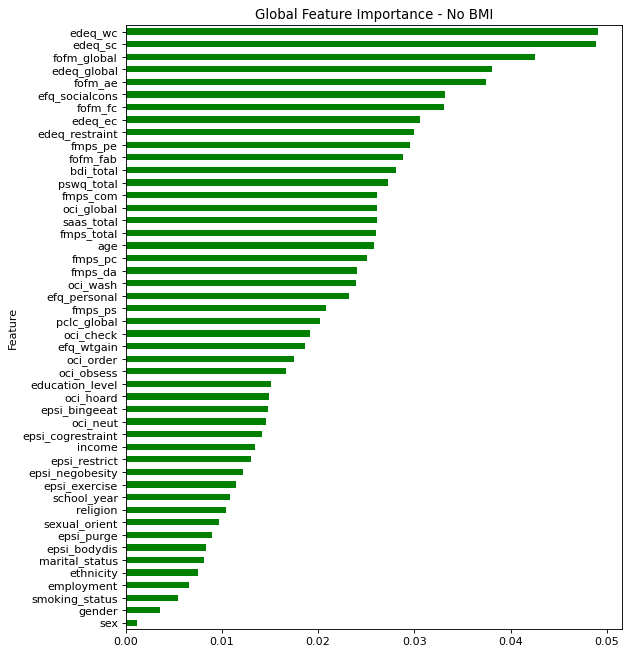

In [118]:
from matplotlib.pyplot import figure
global_importances = pd.Series(RF.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)


figure(figsize=(8, 10), dpi=80)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - No BMI")
global_importances.plot.barh(color='green')
plt.savefig('C:/Users/Luis/Documents/GitHub/anaan_ml/ML Python Code/FeatureImportanceNoBMI.png', bbox_inches='tight')


In [ ]:
global_importances

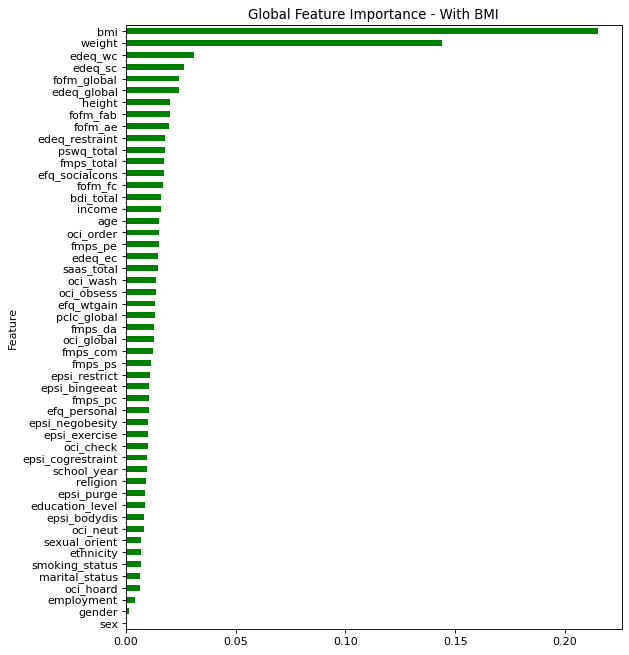

In [119]:
global_importances2 = pd.Series(RF2.feature_importances_, index=X2_train.columns)
global_importances2.sort_values(ascending=True, inplace=True)

figure(figsize=(8, 10), dpi=80)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - With BMI")
global_importances2.plot.barh(color='green')
plt.savefig('C:/Users/Luis/Documents/GitHub/anaan_ml/ML Python Code/FeatureImportanceBMI.png', bbox_inches='tight')

In [120]:
global_importances2

sex                  0.000194
gender               0.001318
employment           0.004374
oci_hoard            0.006621
marital_status       0.006692
smoking_status       0.006861
ethnicity            0.007069
sexual_orient        0.007123
oci_neut             0.008193
epsi_bodydis         0.008367
education_level      0.008687
epsi_purge           0.008693
religion             0.009220
school_year          0.009624
epsi_cogrestraint    0.009869
oci_check            0.009927
epsi_exercise        0.010192
epsi_negobesity      0.010212
efq_personal         0.010390
fmps_pc              0.010488
epsi_bingeeat        0.010776
epsi_restrict        0.011035
fmps_ps              0.011587
fmps_com             0.012378
oci_global           0.012772
fmps_da              0.012826
pclc_global          0.013183
efq_wtgain           0.013449
oci_obsess           0.013595
oci_wash             0.013650
saas_total           0.014516
edeq_ec              0.014770
fmps_pe              0.015074
oci_order 

In [121]:
#building a Naive Bayes model

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB2 = GaussianNB()

In [122]:
nbcv_result = cross_validation(NB, nobmix, y, 5)
print(nbcv_result)

{'fit_time': array([0.01100922, 0.00300288, 0.00300288, 0.00300264, 0.00200176]), 'score_time': array([0.00500464, 0.00300217, 0.00300264, 0.00300288, 0.00300288]), 'test_accuracy': array([0.53333333, 0.45555556, 0.5       , 0.4494382 , 0.48314607]), 'train_accuracy': array([0.55865922, 0.62849162, 0.56145251, 0.55153203, 0.48467967]), 'test_precision': array([0.54117647, 0.48648649, 0.51807229, 0.49382716, 0.5625    ]), 'train_precision': array([0.55029586, 0.61363636, 0.55263158, 0.54733728, 0.83333333]), 'test_recall': array([0.93877551, 0.375     , 0.89583333, 0.83333333, 0.1875    ]), 'train_recall': array([0.96875   , 0.83937824, 0.97927461, 0.95854922, 0.05181347]), 'test_f1': array([0.68656716, 0.42352941, 0.65648855, 0.62015504, 0.28125   ]), 'train_f1': array([0.70188679, 0.70897155, 0.70654206, 0.69679849, 0.09756098])}
{'Training Accuracy scores': array([0.55865922, 0.62849162, 0.56145251, 0.55153203, 0.48467967]), 'Mean Training Accuracy': 55.696301022393044, 'Training Pre

In [123]:
auc_nobmix_nb= cross_validate(NB, nobmix, y, cv = 5, scoring = make_scorer(roc_auc_score), return_train_score = True)
auc_nobmix_nb['test_score'].mean()

0.4703729052596648

{'Training Accuracy scores': array([0.55865922, 0.61731844, 0.56145251, 0.55153203, 0.48746518]), 'Mean Training Accuracy': 55.528547641648906, 
'Training Precision scores': array([0.55029586, 0.609375  , 0.55263158, 0.54733728, 0.84615385]), 
'Mean Training Precision': 0.621158712239178, 
'Training Recall scores': array([0.96875   , 0.80829016, 0.97927461, 0.95854922, 0.05699482]), 
'Mean Training Recall': 0.7543717616580311, 
'Training F1 scores': array([0.70188679, 0.69487751, 0.70654206, 0.69679849, 0.10679612]), 
'Mean Training F1 Score': 0.5813801928018086, 
'Validation Accuracy scores': array([0.53333333, 0.44444444, 0.5       , 0.4494382 , 0.48314607]), 
'Mean Validation Accuracy': 48.207240948813975, 
'Validation Precision scores': array([0.54117647, 0.47058824, 0.51807229, 0.49382716, 0.5625    ]), 
'Mean Validation Precision': 0.5172328311065613, 
'Validation Recall scores': array([0.93877551, 0.33333333, 0.89583333, 0.83333333, 0.1875    ]), 'Mean Validation Recall': 0.6377551020408163, 
'Validation F1 scores': array([0.68656716, 0.3902439 , 0.65648855, 0.62015504, 0.28125   ]), 
'Mean Validation F1 Score': 0.5269409309992279}

In [124]:
nb2cv_result = cross_validation(NB2, x, y, 5) #results are identical whether or not naive bayes has BMI
print(nb2cv_result)

{'fit_time': array([0.00400352, 0.00300288, 0.00200152, 0.00300241, 0.00300288]), 'score_time': array([0.00300288, 0.00300264, 0.00300264, 0.00300288, 0.00200176]), 'test_accuracy': array([0.53333333, 0.45555556, 0.51111111, 0.4494382 , 0.48314607]), 'train_accuracy': array([0.55865922, 0.63128492, 0.55865922, 0.54874652, 0.48467967]), 'test_precision': array([0.54117647, 0.48571429, 0.52380952, 0.49382716, 0.5625    ]), 'train_precision': array([0.55029586, 0.61509434, 0.55131965, 0.54599407, 0.83333333]), 'test_recall': array([0.93877551, 0.35416667, 0.91666667, 0.83333333, 0.1875    ]), 'train_recall': array([0.96875   , 0.84455959, 0.97409326, 0.95336788, 0.05181347]), 'test_f1': array([0.68656716, 0.40963855, 0.66666667, 0.62015504, 0.28125   ]), 'train_f1': array([0.70188679, 0.71179039, 0.70411985, 0.69433962, 0.09756098])}
{'Training Accuracy scores': array([0.55865922, 0.63128492, 0.55865922, 0.54874652, 0.48467967]), 'Mean Training Accuracy': 55.64059071598637, 'Training Prec

In [125]:
auc_x_nb= cross_validate(NB2, x, y, cv = 5, scoring = make_scorer(roc_auc_score), return_train_score = True)
auc_x_nb['test_score'].mean()

0.47275385764061717

In [ ]:
{'Training Accuracy scores': array([0.55865922, 0.62849162, 0.55865922, 0.55153203, 0.4902507 ]), 
 'Mean Training Accuracy': 55.75185571341872, 
 'Training Precision scores': array([0.55029586, 0.61904762, 0.55131965, 0.54733728, 0.85714286]), 
 'Mean Training Precision': 0.6250286520757984, 
 'Training Recall scores': array([0.96875   , 0.80829016, 0.97409326, 0.95854922, 0.06217617]), 
 'Mean Training Recall': 0.7543717616580311, 
 'Training F1 scores': array([0.70188679, 0.7011236 , 0.70411985, 0.69679849, 0.11594203]), 
 'Mean Training F1 Score': 0.5839741521079769, 
 'Validation Accuracy scores': array([0.53333333, 0.43333333, 0.51111111, 0.4494382 , 0.48314607]), 
 'Mean Validation Accuracy': 48.207240948813975, 
 'Validation Precision scores': array([0.54117647, 0.45454545, 0.52380952, 0.49382716, 0.5625    ]), 
 'Mean Validation Precision': 0.5151717218874081, 
 'Validation Recall scores': array([0.93877551, 0.3125    , 0.91666667, 0.83333333, 0.1875    ]), 
 'Mean Validation Recall': 0.6377551020408163, 
 'Validation F1 scores': array([0.68656716, 0.37037037, 0.66666667, 0.62015504, 0.28125   ]), 
 'Mean Validation F1 Score': 0.5250018479951664}